# Learning from Data: Workshop 4 

 | Date set     | Hand-in date |
|:------------------|:-----------------------------------|
|12th February 2016  | **12:00 Thursday 25th February 2016** |




Note that both paper (BART) and electronic submissions are required.


Candidate number: 002600

In [33]:
% pylab inline
import wget
figsize(10, 8)

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


## Linear regression

Get the following little data set which contains one-dimensional data vectors $\mathbf{x}$ and $\mathbf{t}$.  They are stored as two columns, which the following cell splits into two vectors, <code>x</code> and <code>t</code>

In [34]:
import wget
try: 
    X = loadtxt('linreg.txt')
except IOError:
    wget.download('http://empslocal.ex.ac.uk/~reverson/ECM3420/linreg.txt')
    X = loadtxt('linreg.txt')

print(X.shape)
x = X[:,0]
t = X[:,1]


(20, 2)


  The data were generated
  according to
  \begin{equation*}
    t_n = w_0 + w_1 x_n + \epsilon_n
  \end{equation*}
  where $\epsilon_n$ is Gaussian-distributed noise: $\epsilon_n \sim
  \mathcal{N}(0, \sigma^2)$. Use linear regression to identify the coefficients
  $w_0$ and $w_1$.  Recall that to do this you need to set up a
  *design matrix* $\mathbf{X}$ that contains the features and the dummy
  feature $1$ to go with the bias coefficient $w_0$; thus
  \begin{align*}
    \mathbf{X} =
    \begin{bmatrix}
      1 & x_1\\
      1 & x_2\\
      1 & x_3\\
      \vdots & \vdots\\
      1 & x_N
    \end{bmatrix}
  \end{align*}
  With $\mathbf{X}$ on hand, you can find the coefficients from:
  \begin{align*}
    \mathbf{w} = \mathbf{X}^\dagger \mathbf{t}
  \end{align*}
  where  $\mathbf{t}$ is the vector of the targets and $\mathbf{X}^\dagger$ is the
  pseudo-inverse of $\mathbf{X}$. Use <code>np.linalg.pinv</code> or 
  construct it yourself as $\mathbf{X}^\dagger = (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T$ -- see the lecture slides.
  
Plot the data and the
  regression line.  Measure the correlation between the features and
  targets.  How does it relate to the coefficients?

  Estimate the variance of the noise by find the variance of the
  differences between your prediction of the targets and the actual
  targets.  Thus if $y_n = w_0 + w_1 x_n$ is the prediction of the $n$th
  target, then you could estimate the variance $\sigma^2$ as:
  \begin{align*}
    \sigma^2 = \frac{1}{N} \sum_{n=1}^N (t_n - y_n)^2
  \end{align*}
  Does your estimate of the variance make sense in terms of the average
  deviation of the targets from the prediction?

Correlation Matrix:
[[ 1.          0.97515055]
 [ 0.97515055  1.        ]]
Weights
w0: 0.341527285917 w1: 0.67868360838

Variance of noise: 0.180173702915


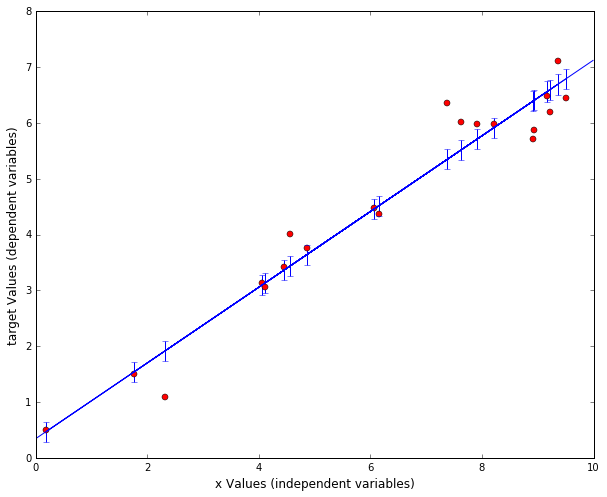

In [35]:
# Creating the designe matrix with the dummy features. 
ones = [1] * 20
X = c_[ones, x]
# Solving for the weights by multiplying the pseudo inverse with the target vector. 
w = linalg.pinv(X) @ t 

# Plotting the regression. 

fig = figure()
ax1 = fig.add_subplot(111)
ax1.plot(x, t, 'ro')
x_values = arange(0, 10, 0.01)
y_values = w[0]+ w[1]*x_values
ax1.plot(x_values, y_values)
xlabel('x Values (independent variables)', size = 12)
ylabel('target Values (dependent variables)', size = 12)


# Calculating the correlation between the features and the target. 
my_correlation = corrcoef(t, x)

print('Correlation Matrix:')
print(my_correlation)
print('Weights')
print('w0: %s w1: %s'% (w[0], w[1]))

# Calculating the residuals (noise). 
predictions = w[0]+ w[1]*x
e1 = (sum((t - predictions)**2))/len(t)
# Plotting the average residual as error bars. 
ax1.errorbar(x, predictions, yerr=e1, color = 'blue')

print('\nVariance of noise: %s' % e1)

><h2> Simple Linear Regression </h2> 
><font color = "black" size = "3"> From the correlation matrix it can be seen that the targets and the features are storngly positively correlated with a correlation coefficient close to one. This positive correlation implies that the targets must have an increasing relationship with the featur values and hence I am expectingt the coefficient w1 to be positive (which is the case). Furthermore, the correlation coefficient is also a good measure to determine how well one variable can predict the other. A correlation coefficient close to unity indicates a very strong ability to predict the other variable. This is supported by the relatively small variance of noise (mean sum squared error) of 0.180173702915. </font>

## Robust linear regression

Standard regression analysis minimises the  squared
error between the regression line and the data, namely:
\begin{equation*}
    E_2(\mathbf{w}) = \sum_{n=1}^N (t_n - y_n(\mathbf{x}; \mathbf{w}) )^2
  \end{equation*}
  where $y_n(\mathbf{w}) = w_0 + w_1 x_n$ and $\mathbf{w} = (w_0, w_1)$. Recall that the
  sum of squares error function $E_2$ comes from the negative log
  likelihood and the assumption that the errors are normally (Gaussian) distributed.

A heavy-tailed distribution that is more appropriate if there are
  occasional large deviations from the systematic trend is the Laplacian
  distribution:
  \begin{align*}
    p(\epsilon_n) = p(t_n \,|\, \mathbf{x}_n, \mathbf{w}) \propto \exp
    \left\{
      - \frac{| \epsilon_n | }{\sigma}
    \right\}
  \end{align*}
Substitute this expression for $p(t_n \,|\, \mathbf{x}_n, \mathbf{w})$ into the
  general expression for an error function $E(\mathbf{w}) = -\sum_{n=1}^N \log
  p(t_n \,|\, \mathbf{x}_n, \mathbf{w}) $ to show that the error function that arises
  from this noise distribution is
  \begin{equation*}
    E_1(\mathbf{w}) = \sum_{n=1}^N |t_n - y_n(\mathbf{x}; \mathbf{w}) |
  \end{equation*}


You can (hand)write this out on paper for submission rather than typing it out in LaTeX.

\begin{equation} 
\begin{split}
E_1(\mathbf{w}) & =
-\sum_{n=1}^N \log p(t_n \,|\, \mathbf{x}_n, \mathbf{w}) \\
& = -\sum_{n=1}^N \ln
    \left(
    \exp
    \left\{
      - \frac{| \epsilon_n | }{\sigma}
    \right\}
    \right)\\
& = 
    -\sum_{n=1}^N
    \left(
    - \frac{| \epsilon_n | }{\sigma}
    \right) \\
& = 
    \frac{1}{\sigma}
    \sum_{n=1}^N
    | \epsilon_n | \\
& =
    \frac{1}{\sigma}
    \sum_{n=1}^N
    |t_n - y_n|  
\end{split}
\end{equation}
<br>
<center>Where $y_n = y_n(\mathbf{x}; \mathbf{w})$ and ${\sigma}$ is close to one we can write :</center>
\begin{equation*}
E_1(\mathbf{w}) = \sum_{n=1}^N |t_n - y_n(\mathbf{x}; \mathbf{w}) |
\end{equation*}

The file <code>outlier.txt</code> contains the same data as the one-dimensional linear regression data that you have just been using, but with one target value to be far from the general trend in the data.  You can download it and split it into features and targets with the following.

In [36]:
try: 
    X = loadtxt('outlier.txt')
except IOError:
    !wget --no-verbose http://empslocal.ex.ac.uk/~reverson/ECM3420/outlier.txt
    X = loadtxt('outlier.txt')
print(X.shape)
x = X[:,0]
t = X[:,1]


(20, 2)


Plot $t_n$ versus $x_n$ and find the
  linear regression line for these data using $E_2$. Notice how the
  regression line is grossly affected by the single outlier.


[-1.30420746  0.89842779]

Variance of noise: 1.2328959513


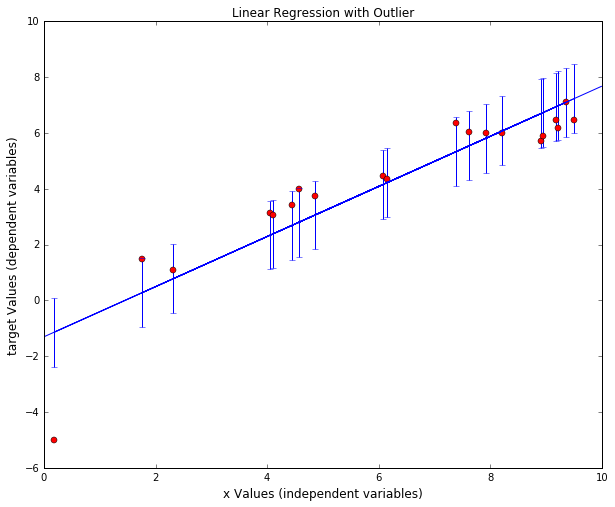

In [37]:
# Creating a ones vector. 
ones = [1] * 20
# Zipping the ones vector and the features vector together as columns.
X2 = c_[ones, x]
# Computing the weights using the pseudo inverse. 
w = linalg.pinv(X2) @ t 
# Creating a model range from 0 to 10. 
x_values = arange(0, 10, 0.01)
y_values = w[0]+ w[1]*x_values

# Plotting
fig = figure()
ax1 = fig.add_subplot(111)
ax1.plot(x, t, 'ro')
ax1.plot(x_values, y_values)
xlabel('x Values (independent variables)', size = 12)
ylabel('target Values (dependent variables)', size = 12)
title('Linear Regression with Outlier')

print(w)
# Creating error bars.
predictions = w[0]+ w[1]*x
e2 = (sum((t - predictions)**2))/len(t)
ax1.errorbar(x, predictions, yerr=e2, color = 'blue')
print('\nVariance of noise: %s' % e2)

><h2> Simple Linear Regression with Outlier </h2> 
><font color = "black" size = "3">The diagram above illustrates how badly the sum square error optimisation performs when the data contains outliers. Comparing this with the previous diagram we can see that the length of the error bars has significantly increase with a total increase in mean sum squared error from 0.180173702915 to 1.2328959513. Also the entire rgression line has shifted downwards giving a poor fit for the data. This is due to the fact that every residual in E2 is exponentially weighted. Hence, an outlier of this size can cause very serious distortions, as seen above. </font>

Write a
  routine to fit a find a straight fitting the data by minimising
  $E_1(\mathbf{w})$.  Note that the pseudo-inverse will not work here.  One
  possibility is to find the minimum error by trying a grid of combinations
  of $w_0$ and $w_1$.  From your plot of the data you should be able to
  estimate appropriate ranges of $w_0$ (the intercept) and $w_1$ (the
  gradient) to search.   If you adopt this approach it is nice to plot a
  contour or <code>pcolor</code> representation of $E_1(\mathbf{w})$ as a function of
  $w_0$ and $w_1$.

   Plot and compare your fitted line with the line derived from the
  squared error (all on the same graph).

  Searching a grid like this works well when there are just two
  coefficients to be found, but is computationally very expensive when
  there are many. An alternative is to use a numerical minimiser such as
  <code>scipy.optimize.fmin</code> to locate the minimum -- you might start the search
  at the solution to the $E_2$ problem.  For example, the following cell will minimise the bannana function of two variables from the starting point <code>x0</code>.

In [38]:
import scipy.optimize

def banana(x):
     return 100*(x[1]-x[0]**2)**2+(1-x[0])**2

xopt = scipy.optimize.fmin(func=banana, x0=[-1.2,1])


Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 85
         Function evaluations: 159


In [39]:
# Function that minimises E1 using brute force. 
def robustReg(data, target, your_grid):
    e1 = [10000, 0, 0]
    error_grid = empty([len(your_grid),len(your_grid)], dtype = float)
    for i, w0 in enumerate(your_grid): 
        for n, w1 in enumerate(your_grid):
            yValues = w0+ w1*data
            e1_temp = sum(abs(target - yValues))
            error_grid[i, n] = e1_temp

            if e1[0] > e1_temp: 
                e1[0] = e1_temp
                e1[1] = w0
                e1[2] = w1 
    return e1, error_grid

# Creating a range that will serve as a grid for the minimisation probelm. 
my_grid = arange(0, 1, 0.001)
w, error_grid = robustReg(x, t, my_grid)

# Minimising E1 using 'scipy.optimize.fmin'. 
# Creating an objective function that can be minimised by scipys optimisation function. 
def objective(p):
    return sum(abs(t - (p[0] + p[1]*x)))

print('\nMinimising E1 using brute force: \nE1: %s, w0: %s, w1: %s' % (w[0], w[1], w[2]))
print('\nMinimising E1 using scipys downhill simplex algorithm:')
popt = scipy.optimize.fmin(func=objective, x0=[0.3 , 0.6])
print('\n w0: %s, w1: %s' % (popt[0], popt[1]))

# Generating the regression line for E1 
y_values2 = w[1] + w[2]*x_values


Minimising E1 using brute force: 
E1: 11.599733, w0: 0.28, w1: 0.69

Minimising E1 using scipys downhill simplex algorithm:
Optimization terminated successfully.
         Current function value: 11.598132
         Iterations: 31
         Function evaluations: 62

 w0: 0.278297431591, w1: 0.690381151536


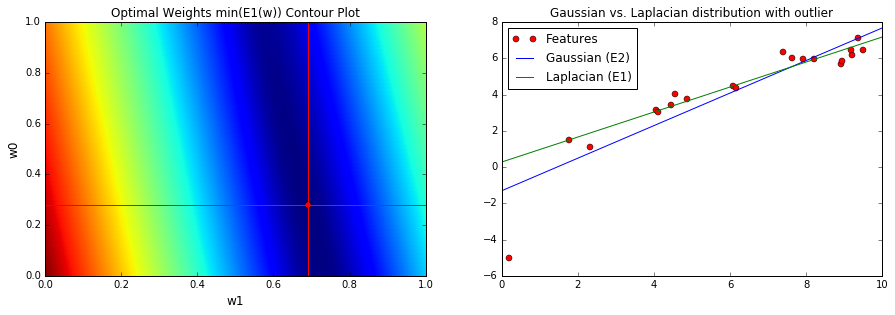

In [40]:
# Plotting the results.
# Weights visualisation.
fig = figure(figsize = (15, 10))
ax = fig.add_subplot(221)
title("Optimal Weights min(E1(w)) Contour Plot")
ax.pcolor(my_grid, my_grid, error_grid)
ax.plot(w[2], w[1], 'ro')
xlabel('w1', size = 12)
ylabel('w0', size = 12)
axhline(w[1], color = 'red', hold=None)
axvline(w[2], color = 'red', hold=None)

# Gaussian vs Laplacian regression visualisation.
ax2 = fig.add_subplot(222)
title("Gaussian vs. Laplacian distribution with outlier")
# Data points. 
ax2.plot(x, t, 'ro', label='Features')
# Gaussian regression line.
ax2.plot(x_values, y_values, label='Gaussian (E2)')
# Laplacian regression line. 
ax2.plot(x_values, y_values2, label='Laplacian (E1)')
legend(loc=2)

Note how the $E_1$ regression line passes close to the majority of the data because the outlier carries less weight than in the $E_2$ case.

><h2> Gauss vs Laplace (with outlier)</h2> 
><font color = "black" size = "3">Since the the Laplacian distribution takes the absolute value instead of the squared value of the error, less weight is dedicated to outliers. From diagrams above we can see that the intercept attained with the Laplacian regression is again positive causing the curve to shift upwards, away from the multiplier. The coefficient w1 also decreased in value causing the line to get flatter giving way to a much better fit of the data. Overall it can be seen that E1 is significantly less biased by the outlier than E2.</font>

## Radial basis function regression

Here is the demonstration of radial basis functions that I showed in a lecture with a couple of modifications.

The first cell just defines a generator that produces colours in turn, which is useful for plotting later.

In [41]:
def colour():
    """Yield colours in turn"""
    colours = "bgrcmyk"
    i = 0
    while True:
        yield colours[i]
        i = (i + 1) % len(colours)

cgen = colour()

### Make some data

In [42]:
N = 20
xtr = rand(N)*3
xtr[:N//2] += 4
xtr = sorted(xtr)         # Sorting helps visualise the design matrix later
ttr = sin(xtr) + randn(N)*0.2

xte = rand(N)*3
xte[:N//2] += 4
xte = sorted(xte)         # Sorting helps visualise the design matrix later
tte = sin(xte) + randn(N)*0.2

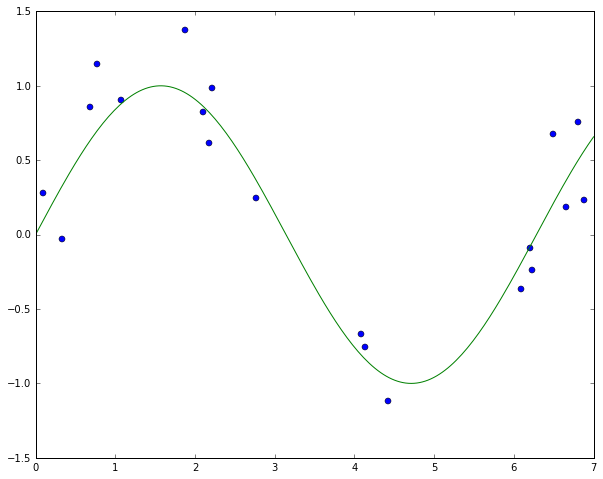

In [43]:
plot(xtr, ttr, 'bo')
xx = linspace(0, 7, 200)
plot(xx, sin(xx), 'g')

### Define radial basis functions

\begin{align*}
\phi(x) = \frac{1}{\sqrt{2\pi}\sigma} \exp\left\{-x^2/(2\sigma^2)\right\}
\end{align*}

In [44]:
def phi(x, c, sigma=0.1):
    """Radial basis function centred at c with "radius" sigma"""
    return exp(-(x-c)**2/(2*sigma**2))/(sqrt(2*pi)*sigma)

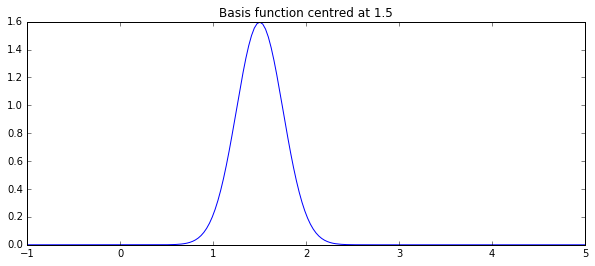

In [45]:
def plot_phi():
    x = linspace(-1, 5, 200)
    c = 1.5
    plot(x, phi(x, c, 0.25))
    title('Basis function centred at %g' % c)
figure(figsize=(10,4))
plot_phi()

### Choose centres and find the activations

In [46]:
# We could choose the centres randomly, but here we'll choose 
# every other one to get an even spread
M = 10
I = np.random.choice(N, M, replace=False)
I = sorted(I)           # Only useful for plotting
print(I)


[1, 7, 8, 9, 10, 11, 12, 14, 16, 18]


Plot the centres $x_m$ and the activations of each of the data points $\phi(x_n-x_m)$.  Note how the activations are large only for the points close to a particular centre.

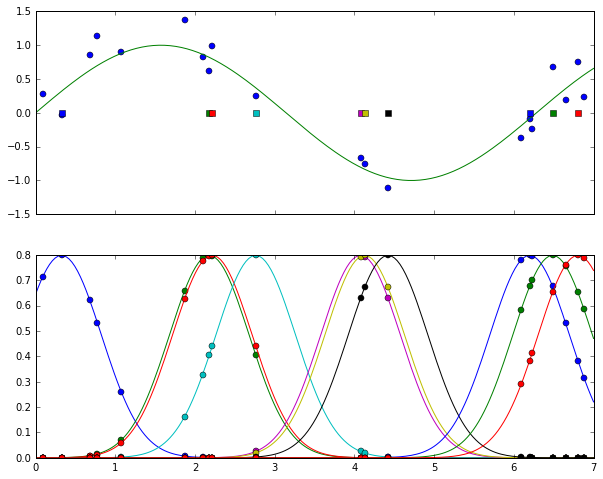

In [47]:
sigma = 0.5     # Choose the width of the basis functions

fig, ax = plt.subplots(2, 1, sharex=True)

ax[0].plot(xtr, ttr, 'bo')
ax[0].plot(xx, sin(xx), 'g')


for i in I:
    colour = next(cgen)
    ax[1].hold(True)
    ax[1].plot(xx, phi(xx, xtr[i], sigma=sigma), c=colour)
    activation = phi(xtr, xtr[i], sigma=sigma)
    ax[1].plot(xtr, activation, ls='', c=colour, marker='o')
    ax[0].plot(xtr[i], 0.0, marker='s', c=colour)

### Construct a design matrix


\begin{align*}
    \newcommand{\bx}{\mathbf{x}}
    \newcommand{\bX}{\mathbf{X}}
    \newcommand{\bw}{\mathbf{w}}
      \bX =
      \begin{bmatrix}
        1 &\phi_1(\bx_1) & \phi_2(\bx_1) & \ldots & \phi_M(\bx_1)\\
        1& \phi_1(\bx_2) & \phi_2(\bx_2) & \ldots & \phi_M(\bx_2)\\
        1 & \phi_1(\bx_3) & \phi_2(\bx_3) & \ldots & \phi_M(\bx_3)\\
        \vdots & & & & \vdots\\
        1 & \phi_1(\bx_N) & \phi_2(\bx_N) & \ldots & \phi_M(\bx_N)\\
      \end{bmatrix}
    \end{align*}


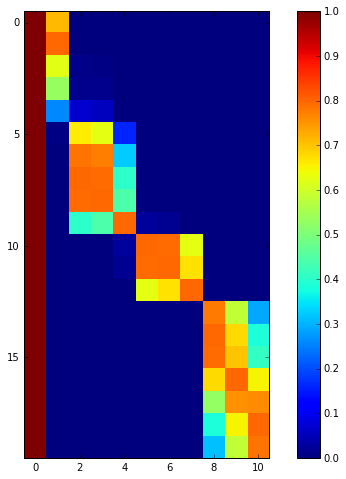

In [50]:
X = zeros((N,M+1))
X[:,0] = 1    # Bias
for m, i in enumerate(I):
    activation = phi(xtr, xtr[i], sigma=sigma)
    X[:,m+1] = activation

imshow(X, interpolation='nearest')
colorbar()

### Solve for the weights using the pseudo-inverse

In [51]:
w = np.linalg.pinv(X) @ ttr

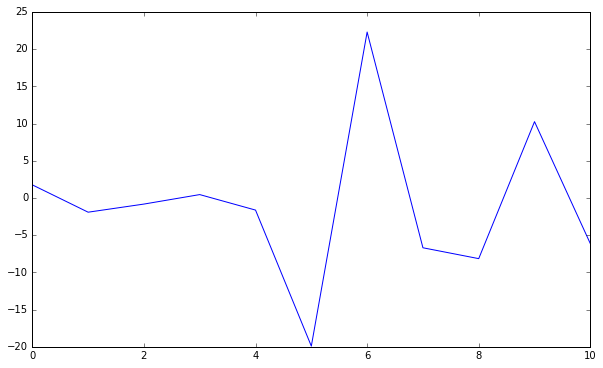

In [52]:
figure(figsize=(10,6))
plot(w)

### Predictions $y(x)$

\begin{align*}
   y(\mathbf{x}; \mathbf{w}) &= w_0 + \sum_{m=1}^M w_m \phi(\mathbf{w}-\mathbf{x}_m)\\
   &= w_0 + \sum_{m=1}^M w_m \phi_m(\mathbf{x})
\end{align*}

In [53]:
# Make predictions at lots of points to get a smooth curve
Npred = 200
xtest = linspace(0, 7, Npred)

X = zeros((Npred,M+1))
X[:,0] = 1    # Bias
for m, i in enumerate(I):
    activation = phi(xtest, xtr[i], sigma=sigma)
    X[:,m+1] = activation

ytest = X@w


(-4, 4)

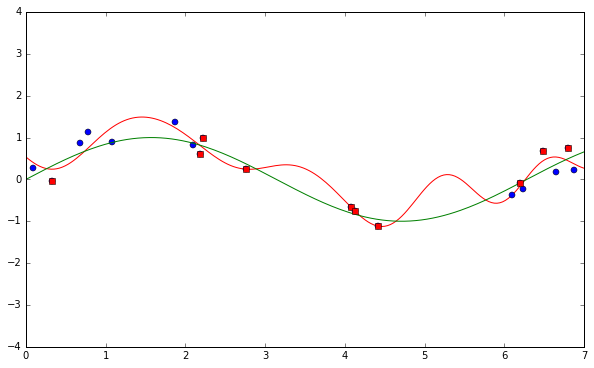

In [54]:
figure(figsize=(10,6))
plot(xtest, ytest, 'r')
plot(xtr, ttr, 'bo')
plot(xx, sin(xx), 'g')

for i in I:
    plot(xtr[i], ttr[i], 'rs')
ylim(ymin=-4, ymax=4)

### Exploring $\sigma$ and $M$

Using the above code as a model write a function

    rbf(xtr, ttr, xte, M, sigma)

that will use the training data <code>xtr</code> and <code>ttr</code> to make predictions for the features <code>xte</code>, using <code>M</code> centres and a width <code>sigma</code> for the radial basis functions.   Your function should return the predictions for <code>xte</code> and the vector of coefficients <code>w</code>.

Use your function to explore the effect of changing $M$ and $\sigma$.  What happens when they are large and small?  Plot both the predictions and the weights.  Notice that $\sigma$ has a smoothing effect when it is large and that poor predictions are made when $\sigma$ is too small.  Also explore what happens when $M$ is large (it can't be larger than the number of training points).  Notice that in this situation the weights can become very large in magnitude and if $\sigma$ is not large enough to provide lots of smoothing then the predictions are very poor where there is not much data.


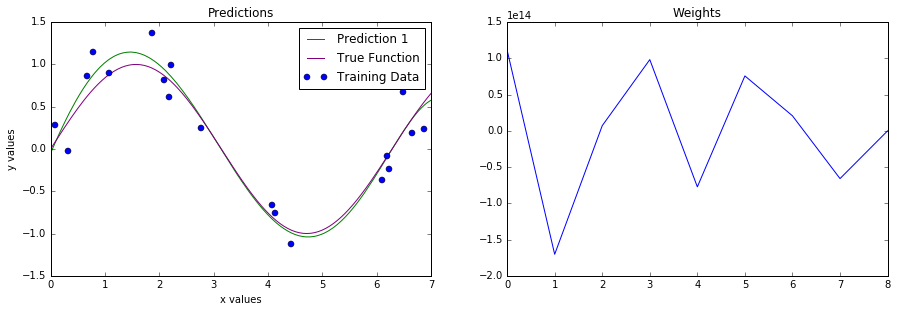

In [55]:
def make_design_matrix(target, training, centers, sigma): 
    #Getting the length of the input data. 
    N = len(target)
    #Getting the order of the basis function regression. 
    M = len(centers)
    #Creating a bias vector. 
    X = zeros((N,M+1))
    X[:,0] = 1    # Bias 
    for n, i in enumerate(centers): 
        #Calculate the activation for each center. 
        acti = phi(target, training[i], sigma= sigma)
        X[:, n] = acti  
    return X

def rbf(xtr, ttr, xte, M, sigma):
    # Chosing the centeres. 
    N = len(xtr)
    assert N >= M
    I = np.random.choice(N, M, replace=False)
    I = sorted(I)
    # Getting eh design matrix. 
    X = make_design_matrix(xtr, xtr, I, sigma)
    # Solving for the optimal weights using the pseudo inverse. 
    w = np.linalg.pinv(X) @ ttr
    X = make_design_matrix(xte, xtr, I, sigma)
    tte = X@w
    
    return tte, w

tte, w = rbf(xtr, ttr, xtest, 8, 28)
# Plotting
# Generating some data to plot the original function. 
xx = linspace(0, 7, 200)
# Plotting the true function against the predictions. 
fig = figure(figsize = (15, 10))
ax = fig.add_subplot(221)
title('Predictions')
ax.plot(xtest, tte, color= 'green', label='Prediction 1')
ax.plot(xx, sin(xx), color = 'purple', label='True Function')
ax.plot(xtr, ttr, 'bo', label='Training Data')
xlabel('x values')
ylabel('y values')
legend(loc=1)
# Plottin the weights. 
ax1 = fig.add_subplot(222)
title('Weights')
ax1.plot(w)

><h2> Exploring $\sigma$ and $M$ </h2> 
><font color = "black" size = "3"> Having tried multiple values for sigma and M it it becomes clear that M controls the overall shape of the predictied data and sigma smoothes the curve. In order to match the first two oscillations of the sin function M has to be greater than 3. Sigma appears to have much control over the functions behaviour on the endpoints.  </font>

Choosing a few centres uniformly at random, as we have done here, seems like a good idea because it should ensure that there are a basis functions covering every region of the feature space.  However, if we are unlucky the basis functions all end up close to each other, leaving other parts of the space without any coverage.  You may have noticed this happening as you experimented. Two alternatives to counter this are:

*  Cluster the data and place a basis function at the centre of each cluster.  Here we still have to choose the number of centres to use.

* Put a basis function on *every* point. This could be expensive with lots of data, but we won't need to worry about this.  However, the weights may become very large and the predictions very poor, particularly if $\sigma$ is small.

It would be nice to have a radial basis function regressor that didn't require us to choose $M$ and $\sigma$.  To achieve this we'll put a basis function on every training data point, removing the need to choose $M$.  A reasonable strategy for choosing $\sigma$ is to set it equal to a multiple of the average distance to neighbouring data points. 

Copy your <code>rbf</code> function to make a new function that chooses $M = N$ and $\sigma$ to be, say 10 times, the average distance to the nearest neighbours.  How well does this perform?  Quantify how well it does by calculating the root mean squared error on the test data.  Is 10 times the average nearest neighbour distance a reasonable choice?  

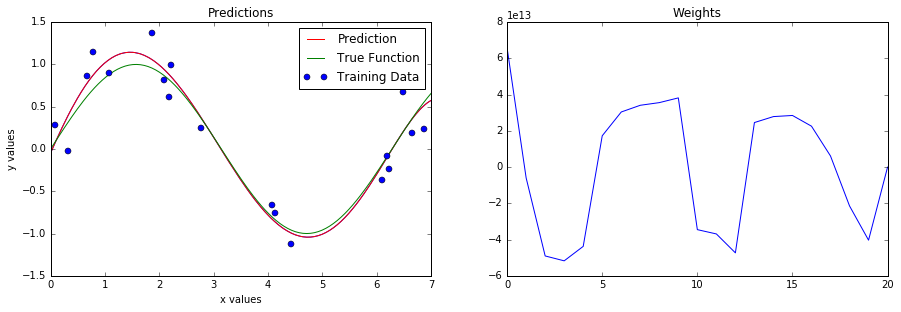

In [56]:
import scipy.stats
import scipy.spatial.distance

def rbf2(xtr, ttr, xte, multi):
    # Chosing the centeres. 
    N = len(xtr)
    M = N
    I = arange(0, N)
    #zipping the training data and target together in oder to calculate the distance between the neighbors. 
    pairs = c_[xtr, ttr]
   
    #Using the scipy spatial distance function to calculate the standardised Euclidian distance between the neighbors.
    distance = scipy.spatial.distance.cdist(pairs, pairs, 'euclidean')
    
    sigma = multi*mean(distance)
    
    X = make_design_matrix(xtr, xtr, I, sigma)
    # Solving for the optimal weights using the pseudo inverse. 
    w = np.linalg.pinv(X) @ ttr
    X = make_design_matrix(xte, xtr, I, sigma)
    tte = X@w
    
    return tte, w

tte, w = rbf2(xtr, ttr, xtest, 10)
fig = figure(figsize = (15, 10))
ax = fig.add_subplot(2, 2, 1)
title('Predictions')
ax.plot(xtest, tte)
ax.plot(xtest, tte, color = 'red', label='Prediction')
ax.plot(xx, sin(xx), label='True Function')
ax.plot(xtr, ttr, 'bo', label='Training Data')
xlabel('x values')
ylabel('y values')
legend(loc=1)
ax1 = fig.add_subplot(2, 2, 2)
title('Weights')
ax1.plot(w)

><h2> $M$ as 10x the average distance to the neighbouring data points </h2> 
><font color = "black" size = "3"> It can be seen that putting a basis function on every data point and choosing sigma to be 10 times the average distance between neighbouring points produces a very close fit of the data. </font>

Optimal multiplier with the smallest root mean squared deviation: 11.0


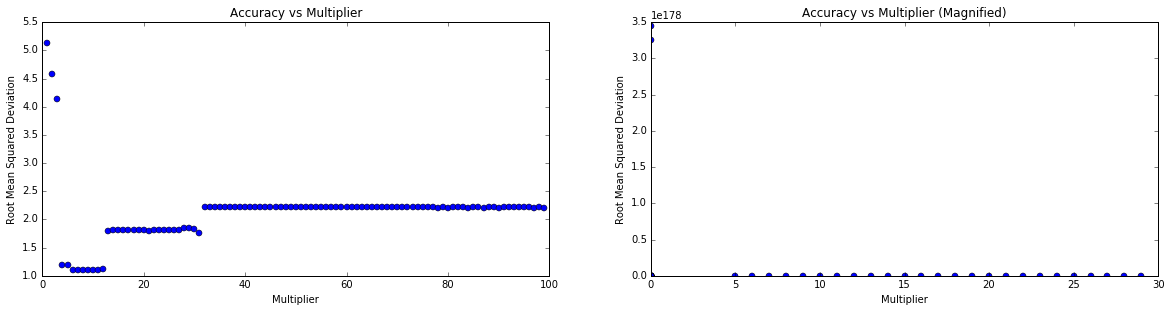

In [57]:
#Calculating the root mean squared deviation. 
def rmsd(target, prediction):
    return sqrt(mean(sum((target-prediction)**2)))
    #return sum((target-prediction)**2)
# Finding the multiplier that minimises the rmsd.
# Creating a range of multipliers that will tested.

test_range = arange(1, 100)
test_range2 = arange(5, 30)

accuracy = empty([2, len(test_range)], dtype = float)
accuracy2 = empty([2, len(test_range)], dtype = float)

for i, n in enumerate(test_range):
    x = rmsd(sin(xtest), rbf2(xtr, ttr, xtest, n)[0])
    accuracy[0, i ] = x
    accuracy[1, i ] = n

for i, n in enumerate(test_range2):
    x = rmsd(sin(xtest), rbf2(xtr, ttr, xtest, n)[0])
    accuracy2[0, i ] = x
    accuracy2[1, i ] = n

optimal = accuracy[1][argsort(accuracy[0])[0]]
print('Optimal multiplier with the smallest root mean squared deviation: %s' %optimal)

# Visualising the effect of the multiplier on the error. 
fig = figure(figsize = (20, 10))
ax = fig.add_subplot(221)
title('Accuracy vs Multiplier')
ax.plot(accuracy[1, :], accuracy[0, :], 'bo')
ylabel('Root Mean Squared Deviation')
xlabel('Multiplier')
ax2 = fig.add_subplot(222)
title('Accuracy vs Multiplier (Magnified)')
ax2.plot(accuracy2[1, :], accuracy2[0, :], 'bo')
ylabel('Root Mean Squared Deviation')
xlabel('Multiplier')


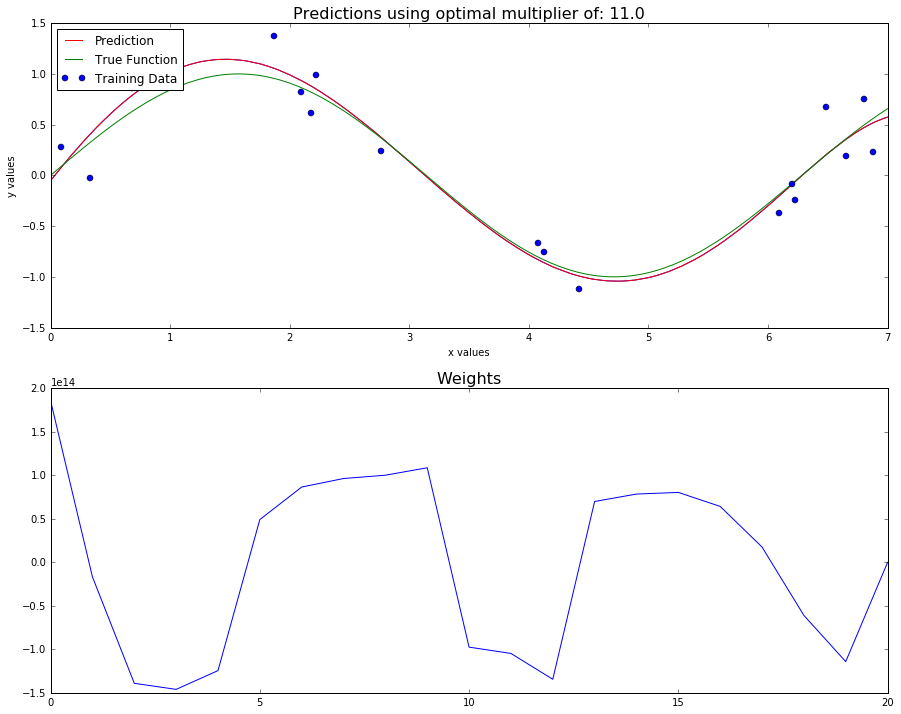

In [58]:
# Plotting the result using the optimal multiplier from above. 
tte, w = rbf2(xtr, ttr, xtest, optimal)
fig = figure(figsize = (15, 12))
ax = fig.add_subplot(2, 1, 1)
title('Predictions using optimal multiplier of: %s'% optimal, size = 16)
ax.plot(xtest, tte)
ax.plot(xtest, tte, color = 'red', label='Prediction')
ax.plot(xx, sin(xx), label='True Function')
ax.plot(xtr, ttr, 'bo', label='Training Data')
xlabel('x values')
ylabel('y values')
legend(loc=2)

ax1 = fig.add_subplot(2, 1, 2)
title('Weights', size = 16)
ax1.plot(w)

><h2> Quantification </h2> 
><font color = "black" size = "3"> The accuracy vs multiplier plot shows the performance of multipliers from 1 to 100 and their corresponding root mean squared deviation (RMSD). It is very noticable that most of the volatility in the RMSD occures for small values of the multiplier between 1 and 4. Having run this script several times this seems to be a consistent. Furthermore, the multiplier 10 performce very well and has been identified as the optimal one, that minimises RMSD serveral times. The RMSD usually ranges from 1.6 to 2.6 with some outliers that can be as high as 5.5. </font>

### Overfitting and regularisation

Minimising the mean squared error on the training data can lead to **overfitting**, where the training data is fitted very well, but the test data is fitted poorly: the model does not **generalise** well.  This is because the model weights have been learned so that they fit not only the systematic trends in the data, but also the noise.  This is particularly a problem when there are lots of weights because in this case there is lots of flexibility in the model so that it is possible to fit the noise.

One way to counteract this in RBF regression is to adjust $\sigma$ so that it provides enough smoothing.   However, this limits the expressiveness of the model and a more general way of controlling the flexibility of the model is to prevent the weights from becoming too large.  You will have noticed that when the model is overfitting it tends to have large weights and it is intuitively clear that if the output of the model can only be large or change rapidly with $x$ if the weights are large. 

We can thus **regularise** the model by adding a penalty to the usual error function that makes the error large if the weights are large.  The penalised error function is
\begin{align}
    E(\mathbf{w}) = E_{data}(\mathbf{w}) + \alpha ||\mathbf{w}||^2
\end{align}
where $E_{data}(\mathbf{w}) = E_2(\mathbf{w}) $ is the mean squared error function that we have been using that measures the difference between the data and the output of the model, and $||\mathbf{w}||^2$ is the sum of the squares of the weights.  Thus the usual error function, the first term, is penalised by the second term: if (over)fitting the data would lead to large weights then that also means that the second term and thus the overall error is large.  Consequently minimising this error term arrives at a balance between fitting the data well and having small weights, effectively controlling the smoothness of the model.  The coefficient $\alpha$ controls how important the penalty is.  If $\alpha$ is small, the penalty is unimportant and the weights can be large; if $\alpha$ is large, the penalty means that the weights must be small and the output of the model smooth.  We will have to choose $\alpha$.

This is known as **weight decay regularisation** because it tends to make the weights small. Do some reading about weight decay regularisation; any of the recommended books will do.

A nice feature of WDR for regression is that $E(\mathbf{w})$ is still quadratic and so the optimum weights can be found by linear algebra.   The regularised weights are found as:
\begin{align}
   \newcommand{\bX}{\mathbf{X}}
\mathbf{w} = (\bX^T \bX + \alpha\mathbf{I})^{-1} \bX^T\mathbf{t}
\end{align}
where $\mathbf{X}$ is the design matrix as above and $\mathbf{t}$ is the vector of training targets.  Note that when $\alpha = 0$ we recover the expression for the pseudo-inverse.

### Weight decay regularisation

Copy and modify your RBF regression function to make a function     

    rbfwdr(xtr, ttr, xte, alpha)

that will use the training data <code>xtr</code> and <code>ttr</code> to make predictions for the features <code>xte</code> using a weight decay regularisation coefficent <code>alpha</code>.  As before your function should return the predictions for <code>xte</code> and the vector of coefficients <code>w</code>.

Plot graphs of the predictions and weights with large and small $\alpha$ and verify that it does control the smoothness of the model output.

In [59]:
def rbfwdr(xtr, ttr, xte, alpha):
     
    N = len(xtr)
    M = N
    I = arange(0, N)
       
    pairs = c_[xtr, ttr]
    
    distance = scipy.spatial.distance.cdist(pairs, pairs, 'euclidean')
    
    sigma = 5*mean(distance)
    
    X = make_design_matrix(xtr, xtr, I, sigma)
    XX = X.T@X
    w =  np.linalg.inv(XX + alpha * np.identity(XX.shape[0])) @ X.T @ ttr
    
    X = make_design_matrix(xte, xtr, I, sigma)
    tte = X@w

    return tte, w



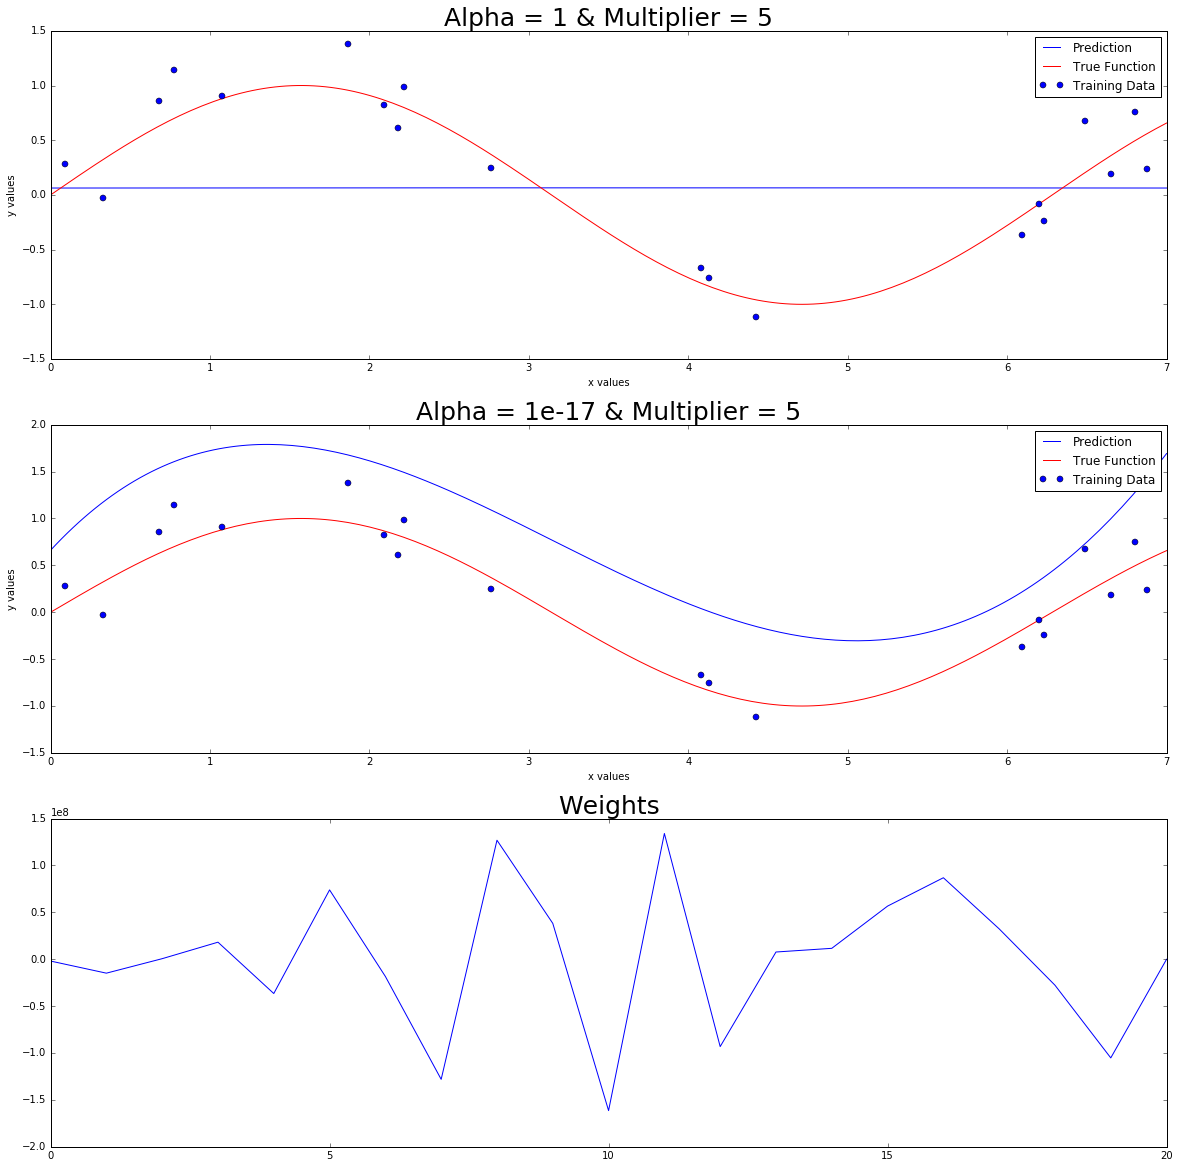

In [60]:
tte, w = rbfwdr(xtr, ttr, xtest, 1)
tte2, w2 = rbfwdr(xtr, ttr, xtest, 1e-17)
fig = figure(figsize = (20, 20))
ax = fig.add_subplot(311)
ax.plot(xtest, tte, label='Prediction')
title('Alpha = 1 & Multiplier = 5', size = 25)
ax.plot(xtest, sin(xtest), color = 'red', label='True Function')
ax.plot(xtr, ttr, 'bo', label='Training Data')
xlabel('x values')
ylabel('y values')
legend(loc=1)
ax2 = fig.add_subplot(312)
title('Alpha = 1e-17 & Multiplier = 5', size = 25)
ax2.plot(xtest, tte2, label='Prediction')
ax2.plot(xtest, sin(xtest), color = 'red', label='True Function')
ax2.plot(xtr, ttr, 'bo', label='Training Data')
xlabel('x values')
ylabel('y values')
legend(loc=1)
ax3 = fig.add_subplot(313)
title('Weights', size = 25)
ax3.plot(w2)

><h2> The Effect of Alpha</h2> 
><font color = "black" size = "3"> From the analysis above it is apparent that alpha control the smoothness of the model output. Also, since we have a basis function (weight) on every point, the penalty is very large causing alpha to have an significant impact on the data output. We can see that an alpha of one creates a straight line, demolishing any predictive power of the model. Only an extremely small alpha of 1e-17 makes the penalty small enough to give the model predictive power.</font>

### Choosing $\alpha$

It remains to choose $\alpha$ which is done by cross validation.   The data set <code>nonlinreg-train.txt</code> and <code>nonlinreg-test.txt</code> contain features and targets for another one-dimensional, nonlinear regression problem.  Use your <code>rbfwdr</code> function to make predictions for these data and choose $\alpha$ by evaluating by cross validation.  You will need to evaluate the training and validation errors for $\alpha$ over a wide range, perhaps $10^{-5}$ to $10^1$; the function <code>logspace</code> is useful for producing equally spaced values: 

    alpha = logspace(1e-5, 1e1, 20)
    print alpha

    [  1.00002303e+00   3.35989158e+00   1.12886115e+01   3.79276373e+01
       1.27429815e+02   4.28140504e+02   1.43847255e+03   4.83300052e+03
       1.62379839e+04   5.45566090e+04   1.83300070e+05   6.15854182e+05
       2.06915563e+06   6.95197851e+06   2.33573562e+07   7.84763775e+07
       2.63666048e+08   8.85868938e+08   2.97635505e+09   1.00000000e+10]

Plot a graph of the training and validation errors versus $\alpha$ (<code>semilogx</code> is useful) and so choose the best $\alpha$ as the one that minimises the validataion error.

You probably won't need to use leave-one-out cross validation, 5-fold cross validation will probably be sufficient.  You can either write your own or you could use the functions in scikit-learn; see <http://scikit-learn.org/stable/modules/cross_validation.html>.  The following cell gives an example of how to generate training and test sets for 5-fold cross validation.

The following cell loads the data

Evaluate your final, cross validated model on the actual test data.  There are many more examples of this so you should get an accurate result, but make sure you haven't used the test data during training.

In [61]:
name = 'nonlinreg-train.txt'
try: 
    X = loadtxt(name)
except:
    wget.download('http://empslocal.ex.ac.uk/~reverson/ECM3420/'+name)
    X = loadtxt(name)
print(X.shape)
xtr = X[:,0]
ttr = X[:,1]

name = 'nonlinreg-test.txt'
try: 
    X = loadtxt(name)
except IOError:
    wget.download('http://empslocal.ex.ac.uk/~reverson/ECM3420/'+name)
    X = loadtxt(name)
print(X.shape)
xte = X[:,0]
tte = X[:,1]


(50, 2)
(500, 2)


In [64]:
from sklearn.cross_validation import KFold

# Since alpha and the multiplier appear to have contracdicting optimisation behaviour
# I have create a second version of the radial basis function with weight decay, that
# can be optimised for alpha as well as the multiplier. 
def rbfwdr2(xtr, ttr, xte, alpha, multi):
     
    N = len(xtr)
    M = N
    I = arange(0, N)
       
    pairs = c_[xtr, ttr]
    
    distance = scipy.spatial.distance.cdist(pairs, pairs, 'euclidean')
    
    sigma = multi*mean(distance)
    
    X = make_design_matrix(xtr, xtr, I, sigma)
    XX = X.T@X
    w =  np.linalg.inv(XX + alpha * np.identity(XX.shape[0])) @ X.T @ ttr
    
    X = make_design_matrix(xte, xtr, I, sigma)
    tte = X@w

    return tte, w
# This function optimises alpha and the multiplier using brute force. 
def optimiseRBF(xtr, ttr, folds, multi_range, alpha_range):
    
    cv = KFold(len(ttr), n_folds=folds)
    
    candidate = empty([folds, 3])
    c = 0 
    grids = []
    for train, test in cv:
        #puling the weights cause test data has a different size.
        optimal = [100000, 0, 0]
        error_grid = empty([len(alpha_range),len(multi_range)], dtype = float)
        for n, k in enumerate(multi_range):  
            for m, i in enumerate(alpha_range):
                accuracy = rmsd(ttr[test], rbfwdr2(xtr[train], ttr[train], xtr[test], i, k)[0])
                error_grid[m, n] = accuracy
                if optimal[0] > accuracy: 
                    optimal[0] = accuracy
                    optimal[1] = i 
                    optimal[2] = k 
    
        candidate[c, :] = optimal
        c += 1
        
    # Find optimal alpha and multiplier by taking the average of every colum. 
    optimalAM = mean(candidate, axis = 0)
    return optimalAM


Optimal Alpha: 2.5831237094e-09 
Optimal Multiplier: 1.4 
Error: 0.305665036757


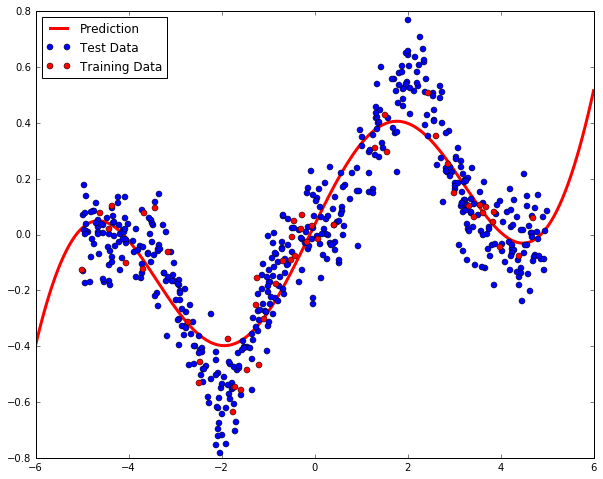

In [66]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Generating ranges of alpha and the multiplier that will be tested for optimality.
multi_range = arange(1, 10)
alpha_range = logspace(-15, 1, 10)

optimalAM = optimiseRBF(xtr, ttr, 5, multi_range, alpha_range)
xtest = linspace(-6, 6, 200)
# Evaluating the test data using the optimal alpha and multiplier found above. 
tte_predictions = rbfwdr2(xtr, ttr, xtest, optimalAM[1], optimalAM[2])[0]
# Plotting

plot(xtest, tte_predictions, color = 'red', label = 'Prediction', linewidth=3)
plot(xte, tte, 'bo', label = 'Test Data')
plot(xtr, ttr, 'ro', label = 'Training Data')
legend(loc=2)

print('Optimal Alpha: %s \nOptimal Multiplier: %s \nError: %s' % (optimalAM[1], optimalAM[2], optimalAM[0]))

><h2> Cross Validation, Optimal Multipler & Alpha</h2> 
><font color = "black" size = "3"> The plot above was generated by optimising alpha and the multiplier in a radial basis function that adjusts for weight decay using a 5 fold cross validation. Eventhough we were dealing with quite a small training sample containing only 50 features the model fits the test data very well optaining an RMSD of only 0.305665036757. Again alpha is with 2.5831237094e-09 very penalising only marginally for the size of the weights. </font>

In [ ]:
from sklearn.cross_validation import KFold

# Make our training data of 10 examples, each of two columns.
# These have just got integers in so that you can easily see which 
# examples have been selected.
X = vstack((arange(10), arange(10))).T + 10
t = arange(10)+100   # Targets
print("Features")
print(X)
print("Targets")
print(t)
print()
print()

cv = KFold(len(t), n_folds=5)

fold = 0
for train, test in cv:
    print('-------- Fold', fold)
    print('Train')
    print(X[train])
    print(t[train])
    print('Test')
    print(X[test])
    print(t[test])
    fold += 1
    # Notice that each training set consists of 8 of the 10 examples 
    # and the test set is the remaining 2.
    # You should train the model with X[train] and t[train]
    # and test it on X[test] and t[test]
    